In [1]:
from pathlib import Path
import cv2
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_path = Path('/mnt/ssd0_1/kashin/ai_edge/segmentation/')

In [16]:
train_imgs_path = base_path / 'seg_train_images'
train_ann_path = base_path / 'seg_train_annotations'

In [35]:
f = next(train_imgs_path.iterdir())

In [36]:
f.name.split('.')[0]

'train_1396'

In [37]:
train_files = [f.name.split('.')[0] for f in train_imgs_path.iterdir()]

## Images

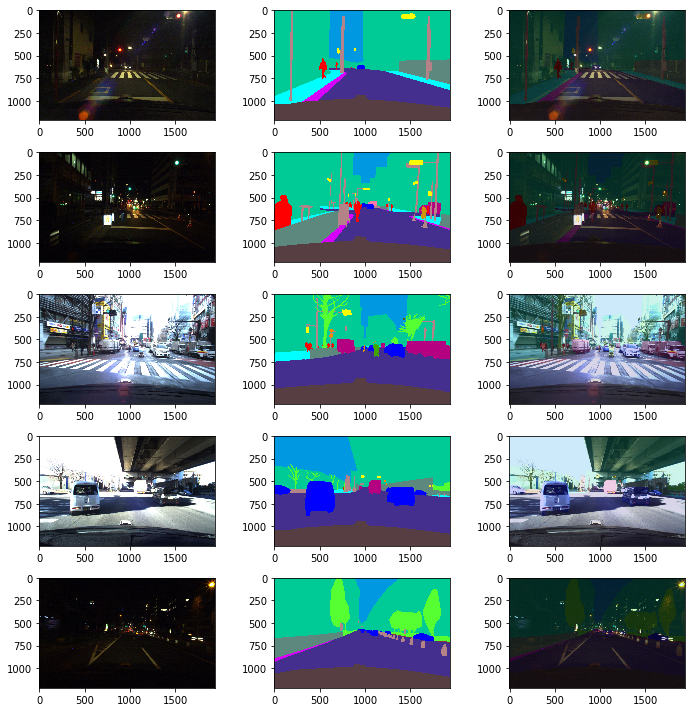

In [50]:
fig, ax = plt.subplots(5, 3, figsize=(10, 10))
for i, f in enumerate(train_files[:5]):
    im = imageio.imread(train_imgs_path / (f + '.jpg'))
    ann = imageio.imread(train_ann_path / (f + '.png'))
    res = im * 0.8 + ann * 0.2
    res = res.astype(int)
    ax[i, 0].imshow(im)
    ax[i, 1].imshow(ann)
    ax[i, 2].imshow(res)
fig.tight_layout()

### Anotation categories

In [51]:
category_list = {'car':[0,0,255],
                 'pedestrian':[255,0,0],
                 'lane':[69,47,142],
                 'bus':[193, 214, 0],
                 'truck':[180,0,129],
                 'svehicle':[255,121,166],
                 'motorbike':[65,166,1],
                 'bicycle':[208,149,1],
                 'signal':[255,255,0],
                 'signs':[255,134,0],
                 'sky':[0,152,225],
                 'building':[0,203,151],
                 'natural':[85,255,50],
                 'wall':[92,136,125],
                 'ground':[136,45,66],
                 'sidewalk':[0,255,255],
                 'roadshoulder':[215,0,255],
                 'obstacle':[180,131,135],
                 'others':[81,99,0],
                 'own':[86,62,67]}

In [55]:
acc_coverage = {category:0 for category in category_list}
count = 0
for ann in train_ann_path.iterdir():
    if '.png' == ann.suffix:
        img_array = imageio.imread(ann)
        for category, rgb in category_list.items():
            category_label = (img_array==rgb).sum(axis=2)==3
            acc_coverage[category] += category_label.sum()/category_label.size
        count+=1
        if count%100==0:
            print(count)
            break
mean_coverage = {category: acc_coverage[category]/count for category in category_list}

100


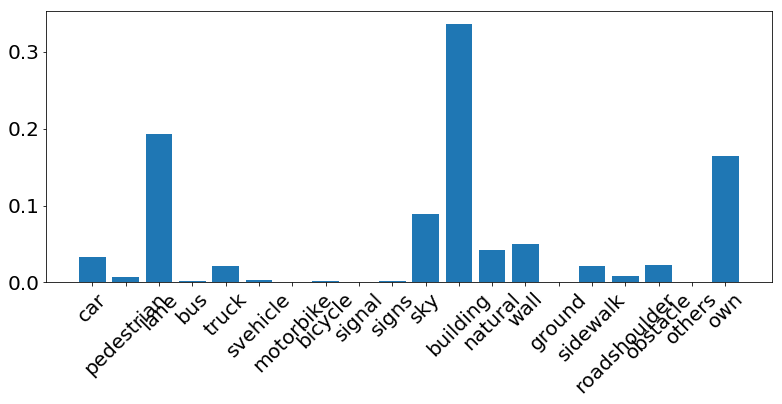

In [78]:
plt.figure(figsize=(13, 5))
plt.bar(list(mean_coverage.keys()), list(mean_coverage.values()))
plt.tick_params(labelsize = 20)
plt.xticks(rotation=45);

## Analysis json

In [93]:
import pandas as pd
import json
from itertools import product

In [88]:
frames = []
routes = []
tods = []
for ann in train_ann_path.iterdir():
    if '.json' == ann.suffix:
        meta = json.loads(ann.read_text())
        frames.append(meta['frameIndex'])
        routes.append(meta['attributes']['route'])
        tods.append(meta['attributes']['timeofday'])

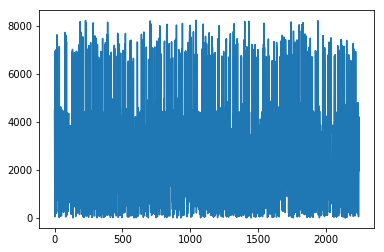

In [90]:
plt.plot(frames)

In [94]:
pd.Series(routes).value_counts()

Tokyo1     1982
Saitama     216
Tokyo2       45
dtype: int64

In [96]:
pd.Series(tods).value_counts()

morning    965
night      646
day        632
dtype: int64

In [91]:
meta

{'attributes': {'route': 'Tokyo1', 'timeofday': 'day'}, 'frameIndex': 1971}

In [103]:
attr_prod = list(product(set(routes), set(tods)))

In [105]:
attr_prod.index(('Saitama', 'day'))

0

In [107]:
attr_prod_ind = []
for ann in train_ann_path.iterdir():
    if '.json' == ann.suffix:
        meta = json.loads(ann.read_text())
        index = attr_prod.index((meta['attributes']['route'],
                                 meta['attributes']['timeofday']))
        attr_prod_ind.append(index)

In [104]:
attr_prod

[('Saitama', 'day'),
 ('Saitama', 'morning'),
 ('Saitama', 'night'),
 ('Tokyo2', 'day'),
 ('Tokyo2', 'morning'),
 ('Tokyo2', 'night'),
 ('Tokyo1', 'day'),
 ('Tokyo1', 'morning'),
 ('Tokyo1', 'night')]

In [112]:
pd.Series(attr_prod_ind).value_counts()

7    749
8    646
6    587
1    216
3     45
dtype: int64